In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

0
The algorithm converged to the desired accuracy.


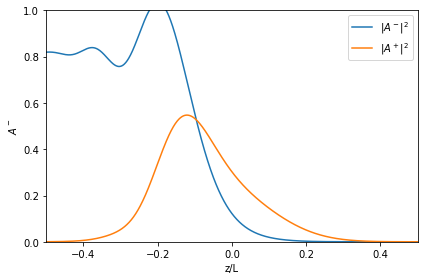

In [2]:
F = 40*np.pi
kappa_0_L = 2*np.pi
Delta = 0

def fun(x, y):
    return np.vstack((y[1], (1j*(2*Delta-F*x)-32*x)*y[1]+((kappa_0_L*np.exp(-16*x**2))**2)*y[0]))

def bc(ya, yb):
    return np.array([ya[1] - (kappa_0_L*np.exp(-4))*np.exp(1j*(-Delta-F/8)), yb[0]])

x = np.linspace(-0.5, 0.5, 1000)
y = np.zeros((2, x.size), dtype=complex)
y[1, :] = 1
sol = solve_bvp(fun, bc, x, y, bc_tol=1e-6)

print(sol.status)
print(sol.message)

A_minus = sol.sol(x)[0]
A_plus = sol.sol(x)[1]/((kappa_0_L)*np.exp(1j*(2*Delta*x-F*x**2/2)))

plt.plot(x, np.abs(A_minus)**2)
plt.plot(x, np.abs(A_plus)**2)
plt.xlabel("z/L")
plt.xlim([-0.5, 0.5])
plt.ylabel(r"$A^-$")
plt.ylim([0, 1])
plt.legend([r"$|A^-|^2$", r"$|A^+|^2$"])

plt.tight_layout()

In [4]:
Delta = np.linspace(-47, 47, 500)

r = np.zeros(len(Delta), dtype=complex)

for i in range(0, len(Delta)):
    
    def fun(x, y):
        return np.vstack((y[1], (1j*(2*Delta[i]-F*x)-32*x)*y[1]+((kappa_0_L*np.exp(-16*x**2))**2)*y[0]))

    def bc(ya, yb):
        return np.array([ya[1] - (kappa_0_L*np.exp(-4))*np.exp(1j*(-Delta[i]-F/8)), yb[0]])

    x = np.linspace(-0.5, 0.5, 1000)
    y = np.zeros((2, x.size), dtype=complex)
    y[1, :] = 1+0*1j
    sol = solve_bvp(fun, bc, x, y, bc_tol=1e-6)
    r[i] = sol.sol(x)[0][0]

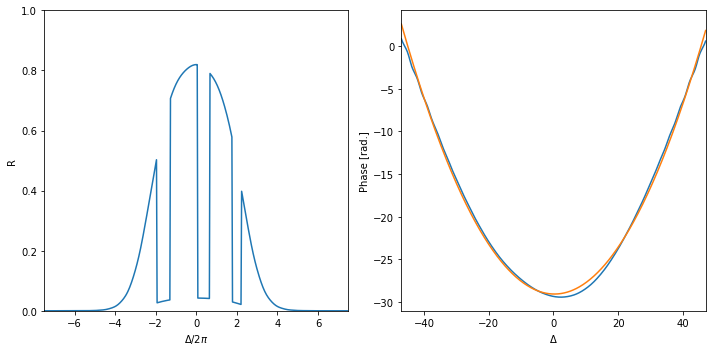

In [5]:
fig = plt.figure(figsize=[10, 5])

ax1 = plt.subplot(1, 2, 1)
plt.plot(Delta/(2*np.pi), np.abs(r)**2)
plt.xlabel(r"$\Delta/2\pi$")
plt.xlim([-7.5, 7.5])
plt.ylabel("R")
plt.ylim([0, 1])

phase = np.unwrap(np.angle(r))
p = np.polyfit(Delta, phase, 2)

ax2 = plt.subplot(1, 2, 2)
plt.plot(Delta, phase)
plt.plot(Delta, p[0]*Delta**2 + p[1]*Delta + p[2])
plt.xlabel(r"$\Delta$")
plt.xlim([-47, 47])
plt.ylabel("Phase [rad.]")

plt.tight_layout()